#Sugar-1
(Copy of Notebook)



# Install

In [ ]:
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.5 MB/s 
     |████████████████████████████████| 9.8 MB 25.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


# Import Library

In [ ]:
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests

# Web Extraction/Scraping

**1. Mendapatkan data dengan API request**

In [ ]:
url = 'https://www.indexmundi.com/commodities/?commodity=sugar&months=360'
page = requests.get(url)

 **2. Parsing halaman HTML menggunakan BeautifulSoup**

In [ ]:
soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html>
<head><meta content="en" http-equiv="content-language"/><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width, initial-scale=1.0" name="viewport"/><title>
	Sugar - Monthly Price - Commodity Prices - Price Charts, Data, and News - IndexMundi
</title><meta content="696085087" property="fb:admins"/><meta content="https://www.indexmundi.com/img/compare-200x200.jpg" property="og:image"/><link href="/s/bootstrap.min.css" rel="stylesheet"/><link href="/s/site.css" rel="stylesheet"/><link href="/s/commodities.2.0.1.css" rel="stylesheet" type="text/css"/>
<style type="text/css">
:focus {
  outline: none;
}
.row {
  margin-right: 0;
  margin-left: 0;
}

.absolute-wrapper{
    position: fixed;
    width: 300px;
    height: 100%;
    background-color: #f8f8f8;
    border-right: 1px solid #e7e7e7;
}

.side-menu {
  position: absolute;
  width: 300px;
  height: 100%;
  background-color: #f8f8f8;
  border-right: 1px solid

**3. Mendapatkan data pada tabel harga Sugar per bulan**

In [ ]:
data_sugar = soup.find_all('table', {'class': 'tblData'})
data_sugar = data_sugar[0].find_all('tr', {'align':'right'})
data_sugar[0:5]

[<tr align="right">
 <td>May 1992</td><td>.21</td><td>-</td>
 </tr>, <tr align="right" style="background-color:#EFEFEF;">
 <td>Jun 1992</td><td>.23</td><td>9.52%</td>
 </tr>, <tr align="right">
 <td>Jul 1992</td><td>.23</td><td>0.00%</td>
 </tr>, <tr align="right" style="background-color:#EFEFEF;">
 <td>Aug 1992</td><td>.22</td><td>-4.35%</td>
 </tr>, <tr align="right">
 <td>Sep 1992</td><td>.21</td><td>-4.55%</td>
 </tr>]

**4. Buat dataframe**

In [ ]:
dfsugar = pd.DataFrame()

**5. Masukkan data dari scraping ke dataframe**

In [ ]:
for m in data_sugar:
  temp = m.find_all('td')
  dfsugar = dfsugar.append({
        'Date': temp[0].text,
        'Price': temp[1].text,
        'Change': temp[2].text
  }, ignore_index=True)
dfsugar.head()

,Date,Price,Change
0,May 1992,.21,-
1,Jun 1992,.23,9.52%
2,Jul 1992,.23,0.00%
3,Aug 1992,.22,-4.35%
4,Sep 1992,.21,-4.55%


# Data Preprocessing

**Merubah tipe kolom Price dan Change menjadi float agar mudah diproses**

In [ ]:
dfsugar['Change'] = dfsugar['Change'].str[:-1]
dfsugar.head()

,Date,Price,Change
0,May 1992,.21,
1,Jun 1992,.23,9.52
2,Jul 1992,.23,0.00
3,Aug 1992,.22,-4.35
4,Sep 1992,.21,-4.55


In [ ]:
dfsugar['Change'] = pd.to_numeric(dfsugar["Change"])
dfsugar['Price'] = pd.to_numeric(dfsugar["Price"])
dfsugar

,Date,Price,Change
0,May 1992,0.21,NaN
1,Jun 1992,0.23,9.52
2,Jul 1992,0.23,0.00
3,Aug 1992,0.22,-4.35
4,Sep 1992,0.21,-4.55
...,...,...,...
355,Dec 2021,0.42,-2.33
356,Jan 2022,0.40,-4.76
357,Feb 2022,0.39,-2.50
358,Mar 2022,0.42,7.69


**Memisahkan kolom Date menjadi Month dan Year**

In [ ]:
dfsugar['Year'] = dfsugar['Date'].str[4:]
dfsugar['Year'] = pd.to_numeric(dfsugar["Year"])

dfsugar['Month'] = dfsugar['Date'].str[:-4]
dfsugar

,Date,Price,Change,Year,Month
0,May 1992,0.21,NaN,1992,May
1,Jun 1992,0.23,9.52,1992,Jun
2,Jul 1992,0.23,0.00,1992,Jul
3,Aug 1992,0.22,-4.35,1992,Aug
4,Sep 1992,0.21,-4.55,1992,Sep
...,...,...,...,...,...
355,Dec 2021,0.42,-2.33,2021,Dec
356,Jan 2022,0.40,-4.76,2022,Jan
357,Feb 2022,0.39,-2.50,2022,Feb
358,Mar 2022,0.42,7.69,2022,Mar


In [ ]:
dfsugar.dtypes

Date       object
Price     float64
Change    float64
Year        int64
Month      object
dtype: object

In [ ]:
dfsugar = dfsugar.iloc[1: , :]
dfsugar

,Date,Price,Change,Year,Month
1,Jun 1992,0.23,9.52,1992,Jun
2,Jul 1992,0.23,0.00,1992,Jul
3,Aug 1992,0.22,-4.35,1992,Aug
4,Sep 1992,0.21,-4.55,1992,Sep
5,Oct 1992,0.19,-9.52,1992,Oct
...,...,...,...,...,...
355,Dec 2021,0.42,-2.33,2021,Dec
356,Jan 2022,0.40,-4.76,2022,Jan
357,Feb 2022,0.39,-2.50,2022,Feb
358,Mar 2022,0.42,7.69,2022,Mar


# EDA (exploratory data analysis)

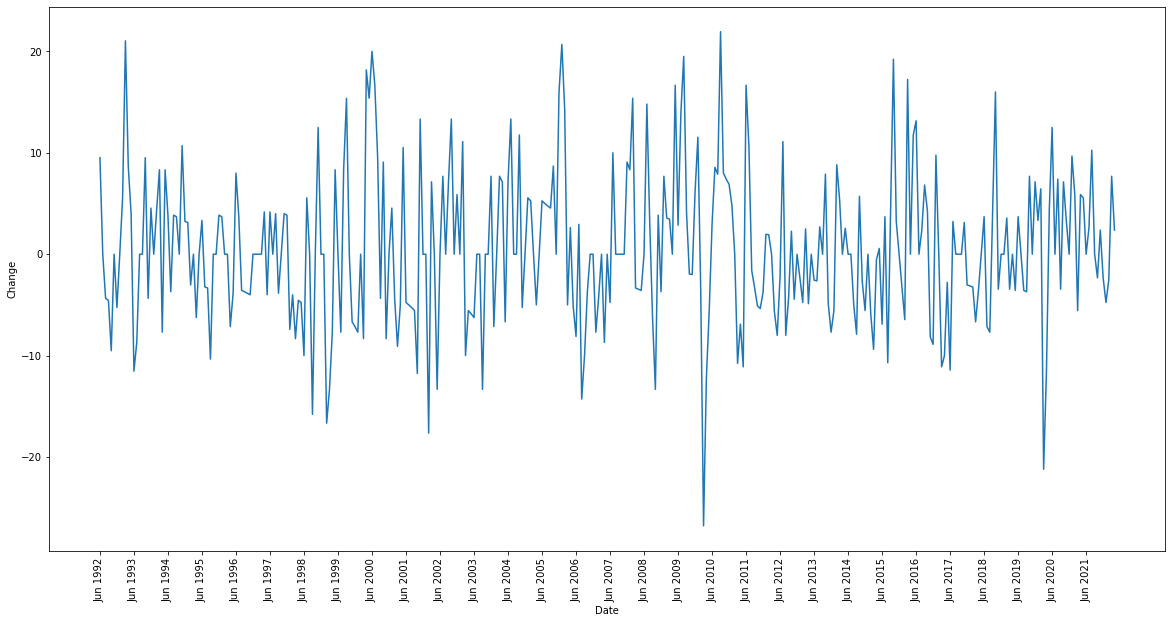

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
plt.plot(dfsugar['Date'], dfsugar['Change'])

ax.set_xticks(dfsugar['Date'][::12])
plt.xticks(rotation='vertical')

plt.xlabel('Date')
plt.ylabel('Change')
plt.show()

Dari grafik, terlihat bahwa data kemungkinan stasioner. Grafik menunjukkan pola sepanjang waktu yaitu naik-turun. Lalu, mean, variance, dan covariance relatif konstan.


## Trend

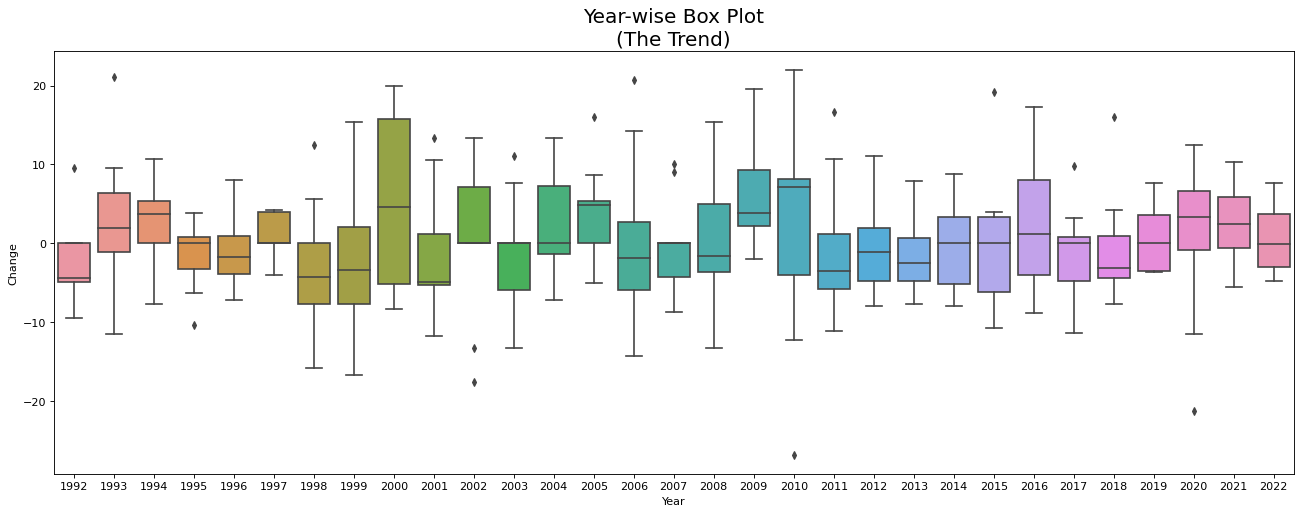

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='Change', data=dfsugar)

axes.set_title('Year-wise Box Plot\n(The Trend)', fontsize=18)
plt.show()

Dari grafik di atas didapatkan bahwa median Change tidak pernah di luar range -10% sampai 10%. Lalu, median Change juga berpola naik-turun setiap tahunnya.

## Seasonality

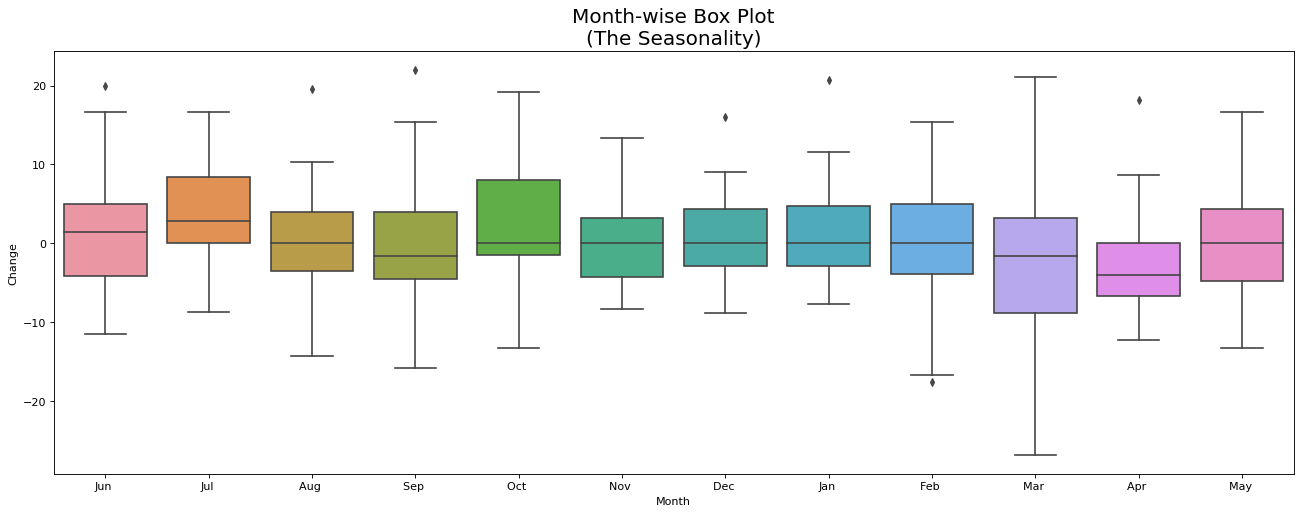

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(20,7), dpi= 80)
sns.boxplot(x='Month', y='Change', data=dfsugar)

axes.set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

Grafik di atas adalah boxplot bulanan dari seluruh tahun 1992-2022. Dari tren per bulan, median Change selalu di sekitar 0. Kuartil data paling luas intervalnya pada bulan Maret dimana Change paling tinggi mencapai sekitar 20% dan paling rendah lebih dari -20%. Yang menarik adalah, ukuran kuartil-kuartil setiap bulan tidak jauh berbeda dari bulan lainnya kecuali pada october dimana kuartil 3 relatif lebih besar. Median setiap bulan kurang lebih sama, yaitu sangat dekat dengan 0%.


## Yearly average

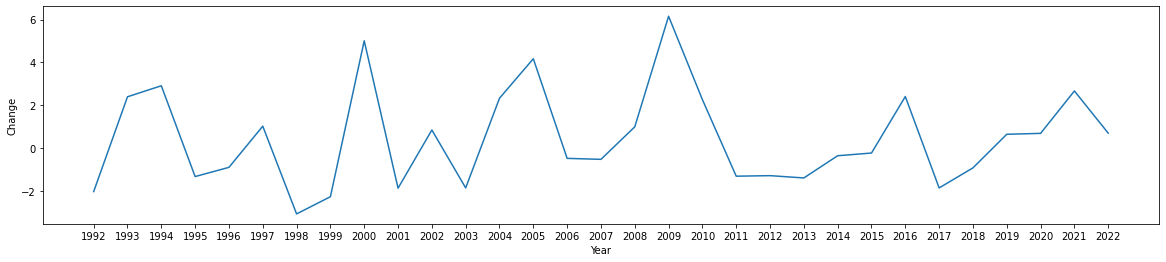

In [ ]:
yearly_avg = dfsugar.groupby('Year').mean()

fig,ax = plt.subplots(figsize=(20,4))
yearly_change = sns.lineplot(data=yearly_avg, ax=ax, x="Year", y="Change")
labels = [i for i,y in yearly_avg.iterrows()]
plt.xticks(labels)
plt.show()

Grafik di atas adalah rata-rata Change pada setiap tahun dengan nilai tertinggi ada pada tahun 2009 sementara nilai terendah pada tahun 1998. Namun, secara keseluruhan tidak ada pola tertentu terhadap rata-rata nilai Change kecuali adanya naik turun seiring waktu.


# Modelling

In [ ]:
print(dfsugar.shape)
train=dfsugar.iloc[:-108] #testing: 30% dari 360 data
test=dfsugar.iloc[-108:]
print(train.shape,test.shape)

(359, 5)
(251, 5) (108, 5)


In [ ]:
train

,Date,Price,Change,Year,Month
1,Jun 1992,0.23,9.52,1992,Jun
2,Jul 1992,0.23,0.00,1992,Jul
3,Aug 1992,0.22,-4.35,1992,Aug
4,Sep 1992,0.21,-4.55,1992,Sep
5,Oct 1992,0.19,-9.52,1992,Oct
...,...,...,...,...,...
247,Dec 2012,0.43,0.00,2012,Dec
248,Jan 2013,0.42,-2.33,2013,Jan
249,Feb 2013,0.40,-4.76,2013,Feb
250,Mar 2013,0.41,2.50,2013,Mar


## ARIMA

https://medium.com/swlh/temperature-forecasting-with-arima-model-in-python-427b2d3bcb53

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(dfsugar['Change'])

1. ADF :  -14.760617105543226
2. P-Value :  2.4055127751762654e-27
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 358
5. Critical Values :
	 1% :  -3.448748905151901
	 5% :  -2.8696473721448728
	 10% :  -2.5710891239349585


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(dfsugar['Change'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2440.697, Time=1.65 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2456.936, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2437.110, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2436.821, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2456.389, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2438.523, Time=0.33 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2438.460, Time=0.52 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2438.969, Time=1.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2435.845, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2437.494, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2437.427, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2436.031, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2437.948, Time=0.47 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 4.999 seconds


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Change'],order=(0,0,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Change   No. Observations:                  251
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -859.024
Date:                Thu, 16 Jun 2022   AIC                           1724.048
Time:                        03:58:21   BIC                           1734.625
Sample:                             0   HQIC                          1728.305
                                - 251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5428      0.596      0.911      0.362      -0.625       1.711
ma.L1          0.2642      0.059      4.511      0.000       0.149       0.379
sigma2        54.9615      4.548     12.084      0.000      46.047      63.876
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 3.26
Prob(Q):                              0.73   Prob(JB):                         0.20
Heteroskedasticity (H):               1.54   Skew:                             0.21
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Evaluasi**

252   -1.108994
253    0.542779
254    0.542779
255    0.542779
256    0.542779
         ...   
355    0.542779
356    0.542779
357    0.542779
358    0.542779
359    0.542779
Name: ARIMA Predictions, Length: 108, dtype: float64

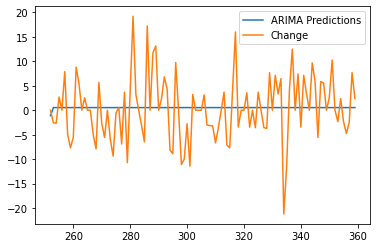

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end).rename('ARIMA Predictions')
pred.plot(legend=True)
test['Change'].plot(legend=True)
pred

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print(test['Change'].mean())
rmse=sqrt(mean_squared_error(pred,test['Change']))
print(rmse)

0.30185185185185187
6.515428733417605


Evaluasi ARIMA:

Dari evaluasi, didapatkan rata-rata dari dataset test dan root mean square errornya. Didapatkan rata-rata yaitu 30% dan RMSE yang cukup rendah dibanding models lainnya yaitu 6.5


## Autoregression (AR)

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
# fit model
ar = AutoReg(train['Change'], lags=40).fit()

# make prediction
ar_predict = ar.predict(start=0, end=len(train['Change']))
ar_forecast = ar.forecast(len(test['Change']))

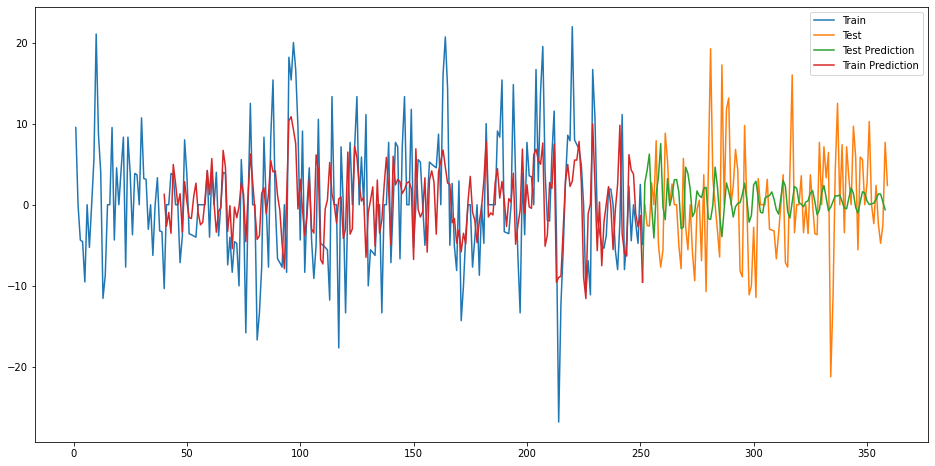

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train['Change'], label='Train')
plt.plot(test['Change'], label='Test')
plt.plot(ar_forecast, label='Test Prediction')
plt.plot(ar_predict, label='Train Prediction')
plt.legend(loc='best')
plt.show()

In [ ]:
# Evaluation
from sklearn.metrics import mean_squared_error
from math import sqrt

print('Mean: ', test['Change'].mean())
rmse=sqrt(mean_squared_error(ar_forecast, test['Change']))
print('RMSE: ', rmse)

Mean:  0.30185185185185187
RMSE:  7.2336139934305885


Evaluasi Auto Regression:

Dari evaluasi, didapatkan rata-rata dari dataset test dan root mean square errornya. Didapatkan rata-rata yaitu 30% dan RMSE yaitu 7.23


## Facebook Prophet

In [ ]:
!pip install pystan==2.19.1.1

!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 2.3 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 45 kB 2.7 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6641308 sha256=1fb8a0a23fc9fb7645ff98323c5f31afb444fd54248c8fba09dd32cdace30b4c
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbproph

In [ ]:
# Python
import pandas as pd
from prophet import Prophet

In [ ]:
dfsugar2 = dfsugar[['Date', 'Change']]
dfsugar2['Date'] = pd.to_datetime(dfsugar['Date'])

dfsugar2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Change
1,1992-06-01,9.52
2,1992-07-01,0.00
3,1992-08-01,-4.35
4,1992-09-01,-4.55
5,1992-10-01,-9.52


In [ ]:
dfsugar2.dtypes
dfsugar2.rename(columns = {'Date':'ds', 'Change':'y'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
dfsugar2

,ds,y
1,1992-06-01,9.52
2,1992-07-01,0.00
3,1992-08-01,-4.35
4,1992-09-01,-4.55
5,1992-10-01,-9.52
...,...,...
355,2021-12-01,-2.33
356,2022-01-01,-4.76
357,2022-02-01,-2.50
358,2022-03-01,7.69


In [ ]:
# Python
m = Prophet()
m.fit(dfsugar2)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=12)
future.tail()

,ds
366,2022-04-09
367,2022-04-10
368,2022-04-11
369,2022-04-12
370,2022-04-13


In [ ]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
366,2022-04-09,-1.960965,-10.892770,6.643450
367,2022-04-10,-1.746080,-10.968599,7.500285
368,2022-04-11,-1.501247,-10.091040,7.637825
369,2022-04-12,-1.232691,-10.962120,8.163623
370,2022-04-13,-0.947243,-10.334117,8.127208


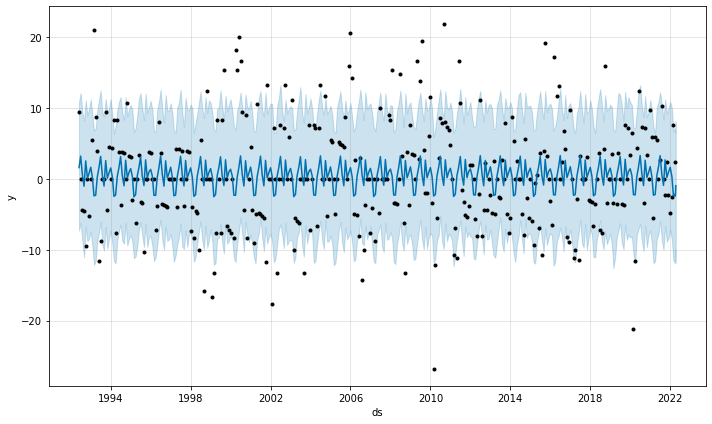

In [ ]:
fig1 = m.plot(forecast)

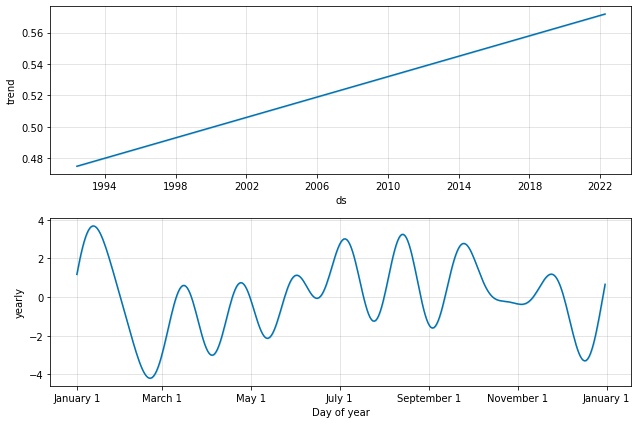

In [ ]:
fig2 = m.plot_components(forecast)


In [ ]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()


INFO:prophet:Making 55 forecasts with cutoffs between 1994-08-21 00:00:00 and 2021-04-01 00:00:00


  0%|          | 0/55 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 20.
INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,37 days,83.041270,9.112698,7.256977,1.104316,1.675233,0.676923
1,38 days,84.057695,9.168298,7.373007,1.104316,1.673845,0.669231
2,39 days,84.177458,9.174827,7.402294,1.133247,1.678903,0.661538
3,40 days,86.837531,9.318666,7.580990,1.139429,1.697817,0.646154
4,41 days,87.307084,9.343826,7.599471,1.159286,1.697817,0.646154


Menggunakan cutoff point dan cross validation, menggunakan initial data yaitu 2 tahun pertama dan prediksi setiap periode adalah 180 hari dari 365 hari. Setiap row di tabel future diberi MSE, RMSE, MAE, MDAPE, SMAPE, dan Coverage. Dari hari ke hari bisa dibandingkan kenaikkan/penuruan metric tersebut. Contohnya, dari hari ke 37 ke 38, ada kenaikkan MSE berarti error meningkat.

## Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

### Simple Exponential Smoothing

In [ ]:
ses_model = SimpleExpSmoothing(train['Change']).fit(smoothing_level = 0.2)

ses_pred = ses_model.predict(start=0, end=len(train['Change']))
ses_forecast = ses_model.forecast(len(test['Change']))

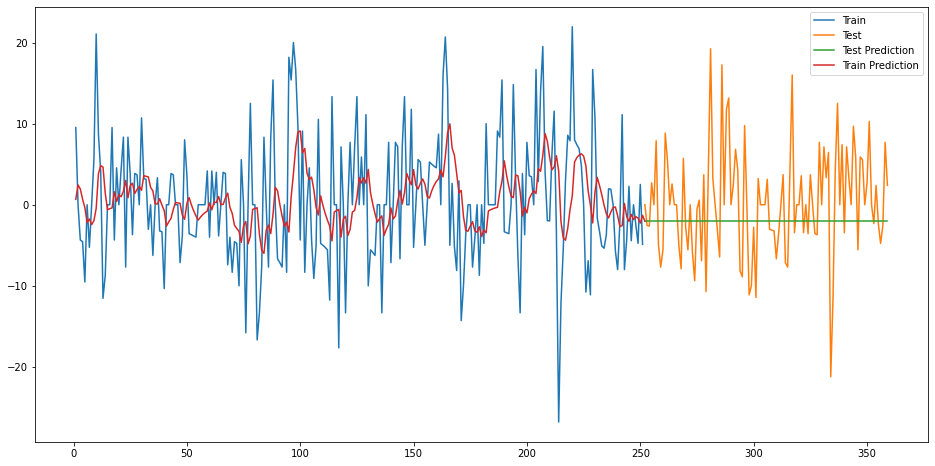

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train['Change'], label='Train')
plt.plot(test['Change'], label='Test')
plt.plot(ses_forecast, label='Test Prediction')
plt.plot(ses_pred, label='Train Prediction')
plt.legend(loc='best')
plt.show()

In [ ]:
# Evaluation
from sklearn.metrics import mean_squared_error
from math import sqrt

print('Mean: ', test['Change'].mean())
rmse=sqrt(mean_squared_error(ses_forecast, test['Change']))
print('RMSE: ', rmse)

Mean:  0.30185185185185187
RMSE:  6.9137682754898355


Evaluasi simple exponential:

Dari evaluasi, didapatkan rata-rata dari dataset test dan root mean square errornya. Didapatkan rata-rata yaitu 30% dan RMSE yang cukup rendah yaitu 6.91


### Double Exponential Smoothing

In [ ]:
des_model = Holt(train['Change']).fit(smoothing_level = 0.8, smoothing_trend=0.1)

res_predict = des_model.predict(start=0, end=len(train['Change']))
res_forecast = des_model.forecast(len(test))

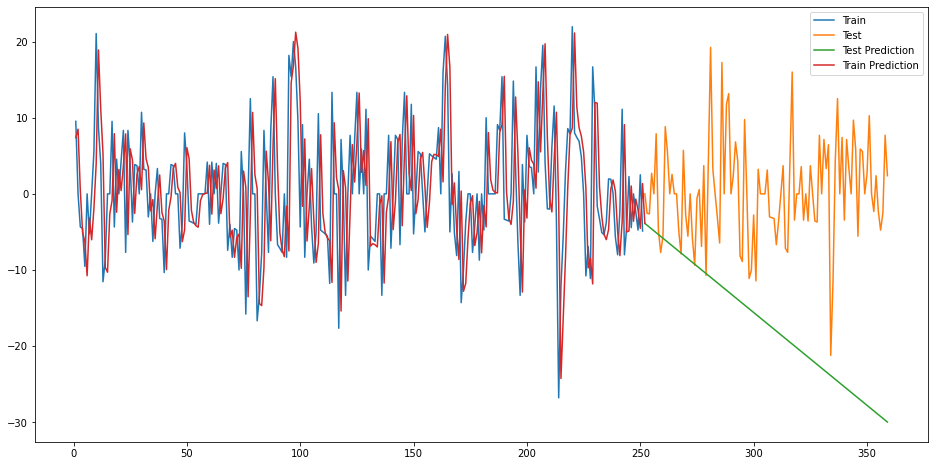

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train['Change'], label='Train')
plt.plot(test['Change'], label='Test')
plt.plot(res_forecast, label='Test Prediction')
plt.plot(res_predict, label='Train Prediction')
plt.legend(loc='best')
plt.show()

In [ ]:
# Evaluation
from sklearn.metrics import mean_squared_error
from math import sqrt

print('Mean: ', test['Change'].mean())
rmse=sqrt(mean_squared_error(res_forecast, test['Change']))
print('RMSE: ', rmse)

Mean:  0.30185185185185187
RMSE:  20.172830896012123


Evaluasi double exponential:

Dari evaluasi, didapatkan rata-rata dari dataset test dan root mean square errornya. Didapatkan rata-rata yaitu 30% dan RMSE yang cukup tinggi yaitu 20.17


### Triple Exponential Smoothing

In [ ]:
tes_model = ExponentialSmoothing(train['Change'], seasonal_periods=12).fit(
    smoothing_level = 0.8, smoothing_trend = 0.2, optimized= True)

res_forecast = tes_model.forecast(len(test))
res_predict = tes_model.predict(start=0, end=len(train['Change']))

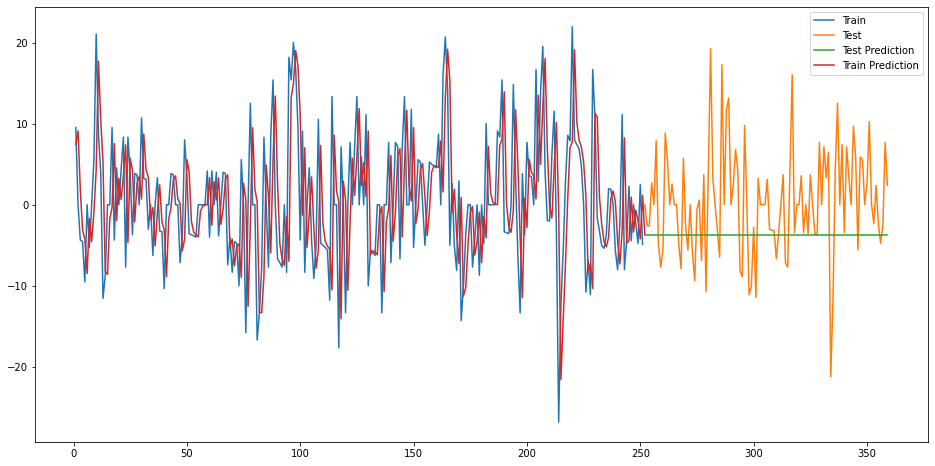

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train['Change'], label='Train')
plt.plot(test['Change'], label='Test')
plt.plot(res_forecast, label='Test Prediction')
plt.plot(res_predict, label='Train Prediction')
plt.legend(loc='best')
plt.show()

In [ ]:
# Evaluation
from sklearn.metrics import mean_squared_error
from math import sqrt

print('Mean: ', test['Change'].mean())
rmse=sqrt(mean_squared_error(res_forecast, test['Change']))
print('RMSE: ', rmse)

Mean:  0.30185185185185187
RMSE:  7.627454441928322


Evaluasi Triple Exponential:

Dari evaluasi, didapatkan rata-rata dari dataset test dan root mean square errornya. Didapatkan rata-rata yaitu 30% dan RMSE sebesar 7.63


Evaluasi exponential:

Dari metric RMSE, dihitung root dari error setiap titik di grafik prediksi. Diketahui bahwa RMSE yang lebih kecil adalah model yang lebih bagus karena sedikitnya error dari true value. Dari ketiga model exponential, simple exponential adalah model dengan RMSE terkecil yaitu 6.9, dibandingkan dengan double 20.2 dan triple 7.6.


Evaluasi Keseluruhan:
Dari seluruh models (ARIMA, AR, FP, Exponential Single/Double/Triple), menurut kami yang paling menggambarkan prediksi dengan jelas adalah Auto Regression (AR) karena RMSEnya cukup rendah dibandingkan yang lain serta grafiknya menggambarkan tren plotting sesuai data testing dan training.
Meskipun begitu, nilai RMSE paling rendah didapatkan oleh ARIMA. Mungkin karena pada ARIMA prediksinya datar dan hanya menggunakan AR tidak seperti SARIMA. Lalu, karena prediksinya datar, maka errornya akan lebih sedikit.
Lalu, dari seluruh models, models yang kami kurang suka adalah Double Exponential. Grafik prediksi Double exponential tidak menggambarkan tren yang sesuai dengan data testing, melainkan garis prediksinya garis lurus miring  turun kebawah. Lalu, untuk RMSEnya paling besar yaitu 20.17.




# Referensi

- https://www.machinelearningplus.com/time-series/time-series-analysis-python/
-